In [2]:

import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np 

In [3]:
ddos = pd.read_csv(r"D:\Metch 1st year\MTech Project\APA-DDoS-Dataset.csv")
ddos

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [4]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

In [5]:
ddos.isnull().sum()

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64

In [6]:
ddos.duplicated().sum()

0

In [7]:
ddos.groupby('Label').size()

Label
Benign          75600
DDoS-ACK        37800
DDoS-PSH-ACK    37800
dtype: int64

In [8]:
ddos['Label'].unique()

array(['DDoS-PSH-ACK', 'Benign', 'DDoS-ACK'], dtype=object)

In [9]:
ddos= ddos.assign(balance_Label = lambda dataframe: dataframe['Label'].map(lambda val: 'DDoS' if val== 'DDoS-PSH-ACK' or val == 'DDoS-ACK' else 'Benign'))
ddos.head()                   

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label,balance_Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK,DDoS
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK,DDoS
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK,DDoS
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK,DDoS
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK,DDoS


In [10]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [11]:
clean_df = handle_non_numerical_data(ddos)

In [12]:
clean_df.head()

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label,balance_Label
0,0,0,2412,8000,6,54,0,0,1,1,...,1,130242,8,432,4,216,4,216,1,1
1,0,0,2413,8000,6,54,0,0,1,1,...,1,81776,10,540,5,270,5,270,1,1
2,0,0,2414,8000,6,54,0,0,1,1,...,1,15161,12,648,6,324,6,324,1,1
3,0,0,2415,8000,6,54,0,0,1,1,...,1,139856,10,540,5,270,5,270,1,1
4,0,0,2416,8000,6,54,0,0,1,1,...,1,43956,6,324,3,162,3,162,1,1


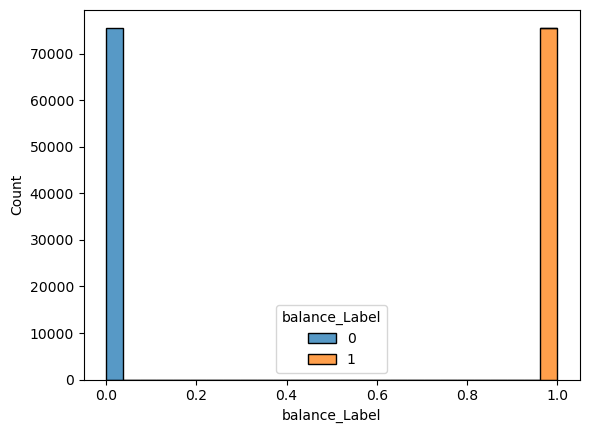

In [13]:
sns.histplot(data=ddos, x='balance_Label', hue='balance_Label', multiple='stack')
plt.show()

In [14]:
feature_column = ['ip.src','ip.dst','tcp.srcport','tcp.dstport','ip.proto','tcp.flags.syn','tcp.flags.reset','tcp.flags.push','tcp.flags.ack','ip.flags.mf','ip.flags.df','ip.flags.rb','tcp.seq','tcp.ack','frame.time','Packets','Bytes','Tx Packets','Tx Bytes','Rx Packets','Rx Bytes']
X = clean_df[feature_column] 
Y = clean_df['balance_Label']
print(X.shape)
print(Y.shape)

(151200, 21)
(151200,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(105840, 21)
(105840,)
(45360, 21)
(45360,)


In [16]:
master_models=[] 
master_preduction=[] 
master_model_result=[]

In [17]:
k=3 
master_models.insert(-1,["Decision Tree",DecisionTreeClassifier()])
master_models.insert(-1,["KNeighbors",KNeighborsClassifier(n_neighbors=k)])
master_models.insert(-1,["RandomForest",RandomForestClassifier()])
master_models.insert(-1,["Support vector machine",svm.SVC(kernel='linear')])
master_models.insert(-1,["Neural Network",MLPClassifier(hidden_layer_sizes=(21,21,21), activation='relu', solver='adam', max_iter=500)])
master_models.insert(-1,["Gradient boosting",GradientBoostingClassifier(random_state=0)])

In [18]:
for name,model in master_models:
    print("Building model : ",name)
    model.fit(X_train,y_train)
    master_preduction.insert(-1,[name,model.predict(X_test)])

Building model :  KNeighbors
Building model :  RandomForest
Building model :  Support vector machine
Building model :  Neural Network
Building model :  Gradient boosting
Building model :  Decision Tree


In [19]:
def detection_rate_score(cm):
    # tp/(tp+fn)
    return cm[0][0]/(cm[0][0]+cm[1][0])
def false_positive_score(cm):
    # fp/(fp+tn)
    return cm[0][1]/(cm[0][1]+cm[1][1])

In [20]:
for name,predict in master_preduction:
    tmp_cm = confusion_matrix(y_test,predict)
    
    master_model_result.insert(-1,[name,accuracy_score(y_test,predict),precision_score(y_test,predict),detection_rate_score(tmp_cm),false_positive_score(tmp_cm)])
    tmp_cm=0

In [21]:
result_df = pd.DataFrame(master_model_result,columns=["model_name","Accuracy", "Precision", "Detection  rate", "False positive rate"])
display(result_df)

,model_name,Accuracy,Precision,Detection rate,False positive rate
0,Support vector machine,1.0,1.0,1.0,0.0
1,Neural Network,1.0,1.0,1.0,0.0
2,Gradient boosting,1.0,1.0,1.0,0.0
3,Decision Tree,1.0,1.0,1.0,0.0
4,KNeighbors,1.0,1.0,1.0,0.0
5,RandomForest,1.0,1.0,1.0,0.0


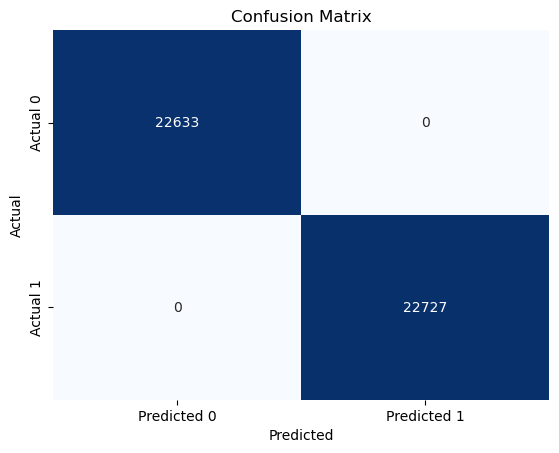

In [22]:
cm = confusion_matrix(y_test, predict)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()